In [ ]:
# Introduction to Machine learning and Algorithms
# Name: Mandar Angchekar
# SUID: 386916341

In [154]:
using Pkg
using CSV
using DataFrames

In [155]:
main_df = DataFrame(CSV.File("missingNoiseKansas.csv - Sheet1.csv"))
main_df

Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64,Int64
1,71,P,A,missing,26,18,6,19,42,17,37
2,71,M,A,8,60,missing,102,134,202,11,11
3,71,A,B,43,missing,80,95,81,81,13,13
4,71,M,B,840,699,668,576,missing,613,45,86
5,71,K,D,64,75,64,missing,59,47,23,32
6,71,E,A,104,99,missing,90,70,65,18,26
7,71,S,F,56,missing,49,41,40,41,10,10
8,71,M,H,16,31,56,missing,104,98,12,14
9,71,R,H,276,281,321,312,370,missing,38,91


In [156]:
#REPLACING WITH INDIVIDUAL MEAN

In [157]:
using Statistics

mean_df = copy(main_df)
relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]

for col in relevant_cols
    mean_df[!, col] = convert(Vector{Union{Float64, Missing}}, mean_df[!, col])
end


function replace_by_mean(df::DataFrame, relevant_cols::Vector{String})
    count = length(relevant_cols)
    for row in eachrow(mean_df)
        sum = 0
        
        for col in relevant_cols
            if row[col]!== missing
                sum = sum + row[col]
                 
            end
        end
        #print(count)
        mean_val = round(sum/count)
        
        for col in relevant_cols
            if row[col] === missing
                row[col] = mean_val
            end
        end
    end
end

replace_by_mean(mean_df, relevant_cols)
mean_df
                




Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,18.0,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,84.0,102.0,134.0,202.0,11,11
3,71,A,B,43.0,63.0,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,566.0,613.0,45,86
5,71,K,D,64.0,75.0,64.0,52.0,59.0,47.0,23,32
6,71,E,A,104.0,99.0,71.0,90.0,70.0,65.0,18,26
7,71,S,F,56.0,38.0,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,51.0,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,260.0,38,91


In [158]:
#REPLACING WITH INDIVIDUAL MEDIAN

In [159]:
using Statistics
median_df = copy(main_df)
for col in relevant_cols
    median_df[!, col] = convert(Vector{Union{Float64, Missing}}, median_df[!, col])
end

relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]
function replace_by_median(df::DataFrame, relevant_cols::Vector{String})
    for row in eachrow(df)
        arr = Float64[]  # Initialize empty array to store non-missing values
        for col in relevant_cols
            if row[col] !== missing
                push!(arr, row[col])
            end
        end
        # Calculate median only if array is not empty, otherwise assign missing
        median_val = isempty(arr) ? missing : median(arr)
        
        for col in relevant_cols
            if row[col] === missing
                row[col] = median_val
            end
        end
    end
end


replace_by_median(median_df, relevant_cols)
display(median_df)


Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,19.0,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,102.0,102.0,134.0,202.0,11,11
3,71,A,B,43.0,81.0,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,668.0,613.0,45,86
5,71,K,D,64.0,75.0,64.0,64.0,59.0,47.0,23,32
6,71,E,A,104.0,99.0,90.0,90.0,70.0,65.0,18,26
7,71,S,F,56.0,41.0,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,56.0,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,312.0,38,91


In [ ]:
#REPLACING WITH FIELD MEDIAN

In [160]:
using Statistics


field_mean_df = copy(main_df)
for col in relevant_cols
    field_mean_df[!, col] = convert(Vector{Union{Float64, Missing}}, field_mean_df[!, col])
end

relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]
function replace_by_field_mean!(df::DataFrame, relevant_cols::Vector{String})
    count = nrow(df)
    print(count)
    for col in relevant_cols
        sum = 0
        for row in eachrow(df)
            if row[col]!== missing
                sum = sum + row[col]
            end
        end
        field_mean = sum/count
        for row in eachrow(df)
            if row[col] === missing
                row[col] = field_mean
            end
        end
    end
end



replace_by_field_mean!(field_mean_df, relevant_cols)
display(field_mean_df)
        

    
    
    

10

Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,183.4,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,169.1,102.0,134.0,202.0,11,11
3,71,A,B,43.0,174.0,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,87.7,613.0,45,86
5,71,K,D,64.0,75.0,64.0,156.6,59.0,47.0,23,32
6,71,E,A,104.0,99.0,169.1,90.0,70.0,65.0,18,26
7,71,S,F,56.0,174.0,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,156.6,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,150.1,38,91


In [ ]:
#REPLACING WITH FIELD MEDIAN

In [161]:
using Statistics


field_median_df = copy(main_df)
for col in relevant_cols
    field_median_df[!, col] = convert(Vector{Union{Float64, Missing}}, field_median_df[!, col])
end

relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]
function replace_by_field_median!(df::DataFrame, relevant_cols::Vector{String})
    
    for col in relevant_cols
        arr = Float64[]
        for row in eachrow(df)
            if row[col]!== missing
                push!(arr, row[col])
            end
        end
        field_median = median(arr)
        for row in eachrow(df)
            if row[col] === missing
                row[col] = field_median
            end
        end
    end
end



replace_by_field_median!(field_median_df, relevant_cols)
display(field_median_df)
        

    
    
    

Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,64.0,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,72.0,102.0,134.0,202.0,11,11
3,71,A,B,43.0,87.0,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,75.5,613.0,45,86
5,71,K,D,64.0,75.0,64.0,98.5,59.0,47.0,23,32
6,71,E,A,104.0,99.0,72.0,90.0,70.0,65.0,18,26
7,71,S,F,56.0,87.0,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,98.5,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,81.0,38,91


In [ ]:
#REPLACING WITH LOCAL GRADIENT

In [162]:
using Statistics


lg_df = copy(main_df)
for col in relevant_cols
    lg_df[!, col] = convert(Vector{Union{Float64, Missing}}, lg_df[!, col])
end

relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]
function replace_by_local_gradient!(df::DataFrame, relevant_cols::Vector{String})
    count = length(relevant_cols)
    for row in eachrow(df)
        sum = 0
       for col in relevant_cols
            if row[col] === missing
                if col === "cit_2017"
                    row[col] = (2*row["cit_2018"]) - (2*row["cit_2019"]) 
                elseif col === "cit_2022"
                    row[col] = (2*row["cit_2021"]) - (2*row["cit_2020"])
                else
                    for col in relevant_cols
                        if row[col] !== missing
                            sum = sum + row[col]
                        end
                    end
                    mean = sum/count
                    for col in relevant_cols
                        if row[col] === missing
                            row[col] = mean
                        end
                    end     
                end
            end
        end
    end
end
replace_by_local_gradient!(lg_df, relevant_cols)
display(lg_df)
    

Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,16.0,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,84.3333,102.0,134.0,202.0,11,11
3,71,A,B,43.0,63.3333,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,566.0,613.0,45,86
5,71,K,D,64.0,75.0,64.0,51.5,59.0,47.0,23,32
6,71,E,A,104.0,99.0,71.3333,90.0,70.0,65.0,18,26
7,71,S,F,56.0,37.8333,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,50.8333,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,116.0,38,91


In [ ]:
#REPLACING WITH NEAREST NEIGHBOR L1

In [163]:

l1_df = copy(main_df)
relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]
# Convert the selected columns to Float64 while keeping missing values as missing
for col in relevant_cols
    l1_df[!, col] = convert(Vector{Union{Float64, Missing}}, l1_df[!, col])
end


function calculate_11!(row1::DataFrameRow, row2::DataFrameRow, df::DataFrame, relevant_cols::Vector{String})
    dist = 0.0  # Initialize as a Float
    sum = 0.0
    count = 0
    for col in relevant_cols
        if !ismissing(row1[col]) && !ismissing(row2[col])
            sum = sum + abs(row1[col] - row2[col])
            count = count + 1
        end
    end
    if count > 0
        dist = sum / count
    end
    return dist
end

function nearestNeighbor!(l1_df::DataFrame)
    columns_to_process = ["cit_2017", "cit_2018", "cit_2019", "cit_2020", "cit_2021", "cit_2022"]
    for row1 in eachrow(l1_df)
        distances = []
        for row2 in eachrow(l1_df)
            if row1 !== row2
                dist = calculate_11!(row1, row2, l1_df, columns_to_process)
                push!(distances, dist)
            end
        end
        println(distances)
        min_dist = minimum(distances)
        println(min_dist)
        index = findfirst(x -> x == min_dist, distances)
        for col in columns_to_process
            if ismissing(row1[col])
                if ismissing(l1_df[index+1,col])
                    row1[col] = mean(skipmissing(l1_df[!, col]))
                else
                    row1[col] = l1_df[index+1,col]
                end
            end
        end
    end
    return l1_df
end

nearestNeighbor!(l1_df)
display(l1_df)


Any[101.25, 63.0, 616.0, 35.0, 57.75, 22.0, 46.0, 303.75, 367.0]
22.0
Any[90.6, 54.0, 589.0, 75.25, 69.6, 91.0, 42.75, 233.75, 295.0]
42.75
Any[53.0, 48.0, 599.5, 23.25, 23.25, 35.8, 22.75, 245.0, 304.75]
22.75
Any[649.6, 593.6, 613.2, 642.5, 592.5, 627.5, 654.75, 398.25, 281.8]
281.8
Any[29.6, 61.8, 27.4, 524.125, 23.25, 12.0, 39.2, 246.5, 348.25]
12.0
Any[55.8, 69.6, 32.2, 481.925, 28.4, 37.75, 55.75, 219.0, 298.5]
28.4
Any[17.6, 74.2, 35.8, 515.925, 9.6, 59.222222222222214, 42.0, 273.25, 332.75]
9.6
Any[44.8, 34.2, 18.2, 524.925, 39.2, 72.22222222222221, 47.2, 260.25, 360.5]
18.2
Any[287.0, 240.0, 246.0, 370.675, 251.4, 200.57777777777778, 255.0, 261.0, 121.25]
121.25
Any[367.8, 311.8, 331.4, 281.8, 339.2, 286.97777777777776, 340.2, 334.8, 97.0]
97.0


Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,56.0,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,56.0,102.0,134.0,202.0,11,11
3,71,A,B,43.0,31.0,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,109.625,613.0,45,86
5,71,K,D,64.0,75.0,64.0,41.0,59.0,47.0,23,32
6,71,E,A,104.0,99.0,194.111,90.0,70.0,65.0,18,26
7,71,S,F,56.0,99.0,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,576.0,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,312.0,38,91


In [ ]:
#REPLACING WITH NEAREST NEIGHBOR L2

In [164]:

l2_df = copy(main_df)
relevant_cols = ["cit_2017","cit_2018","cit_2019","cit_2020","cit_2021","cit_2022"]
# Convert the selected columns to Float64 while keeping missing values as missing
for col in relevant_cols
    l2_df[!, col] = convert(Vector{Union{Float64, Missing}}, l2_df[!, col])
end


function calculate_12!(row1::DataFrameRow, row2::DataFrameRow, df::DataFrame, relevant_cols::Vector{String})
    dist = 0.0  # Initialize as a Float
    sum = 0.0
    count = 0
    for col in relevant_cols
        if !ismissing(row1[col]) && !ismissing(row2[col])
            sum = sum + abs(row1[col] - row2[col])^2
            count = count + 1
        end
    end
    if count > 0
        dist = sum / count
    end
    return dist
end

function nearestNeighbor2!(l2_df::DataFrame)
    columns_to_process = ["cit_2017", "cit_2018", "cit_2019", "cit_2020", "cit_2021", "cit_2022"]
    for row1 in eachrow(l2_df)
        distances = []
        for row2 in eachrow(l2_df)
            if row1 !== row2
                dist = calculate_12!(row1, row2, l2_df, columns_to_process)
                push!(distances, dist)
            end
        end
        println(distances)
        min_dist = minimum(distances)
        println(min_dist)
        index = findfirst(x -> x == min_dist, distances)
        for col in columns_to_process
            if ismissing(row1[col])
                if ismissing(l2_df[index+1,col])
                    row1[col] = mean(skipmissing(l2_df[!, col]))
                else
                    row1[col] = l2_df[index+1,col]
                end
            end
        end
    end
    return l2_df
end

nearestNeighbor2!(l2_df)
display(l2_df)


Any[12299.25, 4282.5, 381592.5, 1535.5, 3878.75, 657.0, 2957.5, 93417.75, 139320.5]
657.0
Any[10300.2, 4681.0, 373535.5, 8252.75, 6749.2, 10195.5, 3155.25, 55115.25, 103376.5]
3155.25
Any[3459.8, 3860.0, 373834.5, 584.25, 1030.75, 1465.4, 530.75, 60745.0, 97210.75]
530.75
Any[428205.2, 373737.2, 388312.4, 419181.0, 359549.0, 402806.5, 441242.25, 170731.25, 84436.6]
84436.6
Any[1241.2, 6615.0, 854.6, 335857.378125, 655.25, 171.5, 1786.0, 62537.5, 123717.75]
171.5
Any[3563.8, 6749.2, 1749.4, 287953.228125, 1004.4, 1545.25, 3653.25, 50498.0, 91688.5]
1004.4
Any[525.6, 8166.2, 1465.4, 323214.728125, 137.2, 5447.646913580247, 2248.5, 76181.25, 112971.75]
137.2
Any[2686.0, 2524.2, 424.6, 353000.128125, 1786.0, 6737.535802469136, 2723.6, 67770.25, 137550.5]
424.6
Any[84414.2, 58137.2, 61096.0, 150144.028125, 64718.2, 43618.55802469136, 67569.8, 68155.4, 18041.25]
18041.25
Any[138984.6, 111429.4, 116137.4, 84436.6, 117336.0, 84956.2913580247, 117757.4, 120805.2, 14433.0]
14433.0


Row,univ_rank,first_initial,last_initial,cit_2017,cit_2018,cit_2019,cit_2020,cit_2021,cit_2022,h_index,i_10_index
,Int64,String1,String1,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64
1,71,P,A,56.0,26.0,18.0,6.0,19.0,42.0,17,37
2,71,M,A,8.0,60.0,56.0,102.0,134.0,202.0,11,11
3,71,A,B,43.0,31.0,80.0,95.0,81.0,81.0,13,13
4,71,M,B,840.0,699.0,668.0,576.0,109.625,613.0,45,86
5,71,K,D,64.0,75.0,64.0,41.0,59.0,47.0,23,32
6,71,E,A,104.0,99.0,194.111,90.0,70.0,65.0,18,26
7,71,S,F,56.0,99.0,49.0,41.0,40.0,41.0,10,10
8,71,M,H,16.0,31.0,56.0,576.0,104.0,98.0,12,14
9,71,R,H,276.0,281.0,321.0,312.0,370.0,312.0,38,91


In [ ]:
#COMPUTING ABSOLUTE ERRORS

In [165]:

actual_df = DataFrame(CSV.File("Kansas.csv - Sheet1.csv"))
relevant_cols = ["cit_2017", "cit_2018", "cit_2019", "cit_2020", "cit_2021", "cit_2022"]
missing_val_idx = []
for (row_idx, row) in enumerate(eachrow(main_df))
    for col in relevant_cols
        if ismissing(row[col])
            push!(missing_val_idx, (row_idx,col))
        end
    end
end


function calculate_abs_error(df)
    abs_error = 0
    for (row,col) in missing_val_idx
        abs_error = abs_error + (actual_df[row,col] - df[row,col])
    end
    return abs_error
end

println("Abs error for Individual mean is " * string(calculate_abs_error(mean_df)))
println("Abs error for Individual median is " * string(calculate_abs_error(median_df)))
println("Abs error for Field mean is " * string(calculate_abs_error(field_mean_df)))
println("Abs error for Field median is " * string(calculate_abs_error(field_median_df)))
println("Abs error for Local Gradient is " * string(calculate_abs_error(lg_df)))
println("Abs error for Nearest_neighbor_L1 is " * string(calculate_abs_error(l1_df)))
println("Abs error for Nearest_neighbor_L2 is " * string(calculate_abs_error(l2_df)))


Abs error for Individual mean is 129.0
Abs error for Individual median is -197.0
Abs error for Field mean is 154.70000000000002
Abs error for Field median is 852.0
Abs error for Local Gradient is 274.66666666666663
Abs error for Nearest_neighbor_L1 is 78.63888888888891
Abs error for Nearest_neighbor_L2 is 78.63888888888891


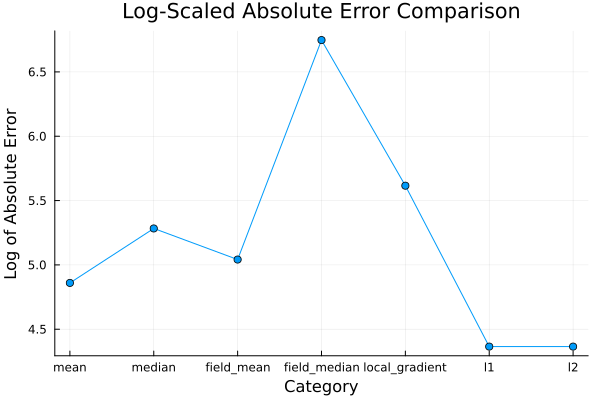

In [166]:
using Plots

# Define the names of the categories
categories = ["mean", "median", "field_mean", "field_median", "local_gradient", "l1", "l2"]

# Define the corresponding absolute error values
values = [129.0, -197.0, 154.70000000000002, 852.0, 274.66666666666663, 78.63888888888891, 78.63888888888891]

# Create a line plot
plot(categories, log.(abs.(values)), 
    legend=false, 
    xlabel="Category", 
    ylabel="Log of Absolute Error", 
    title="Log-Scaled Absolute Error Comparison", 
    marker=:circle, 
    line=:solid
)

# Show the plot
plot!()


In [167]:
#After evaluating the results in the above code cell we can clearly see that the 
#Nearest_Neighbor_L1 and Nearest_Neighbor_L2 has worked best my dataset.